In [1]:
# Import all the necessary libraries.
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.core.display import display, HTML
import math 
import pandas as pd
# Import Class MinMaxScaler from module Preprocessing of library sklearn responsible for normalizing the data.
from sklearn.preprocessing import MinMaxScaler

#%matplotlib notebook


np.random.seed(32)

"""
Generate data points for plotting the error surface.
"""
def calculateErrorSurface(y, x1, x2):
    # Generate values for parameter space.
    N = 200
    a1 = np.linspace(-20.0, 24.0, N)
    a2 = np.linspace(-20.0, 24.0, N)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((N,N))
    for iter1 in range(0, N):
        for iter2 in range(0, N):
            yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
            J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  )
            
    return J, A1, A2
            
"""
Calculate closed-form solution using the normal equation.
"""
def calculateClosedFormSolutionA(X, x1, x2, y):
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = a_opt[0, 0]*x1 + a_opt[1, 0]*x2
    Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )
    
    return Joptimum, a_opt


"""
Batch gradient descent solution Treinamento.
"""
def batchGradientDescentA(alpha, n_iterations, X_b, y):
    
    # Random initialization of parameters.
    a = np.zeros((2,1))
    a[0] = -20;
    a[1] = -20;
    
    Jgd = np.zeros(n_iterations+1)
    Jgd[0] = (1/M)*sum(np.power(y - X_b.dot(a), 2))

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    # Initialize history vector.
    a_hist[0, 0] = a[0]
    a_hist[1, 0] = a[1]
    
    
    error = 1;
    iteration = 0;
    # Batch gradient-descent loop
    while(error > 0.001 and iteration < n_iterations-1):

        gradients = -2/M * X_b.T.dot(y - X_b.dot(a))
        a = a - alpha * gradients
        Jgd[iteration+1] = (1/M)*sum(np.power( (y - X_b.dot(a)) , 2))
        error = np.abs(Jgd[iteration]-Jgd[iteration+1])
        a_hist[0, iteration+1] = a[0]
        a_hist[1, iteration+1] = a[1]

        iteration = iteration + 1
    
    return a, a_hist, Jgd, iteration

"""
Batch gradient descent solution Testes.
"""
def batchGradientDescentTeste(a, n_iterations, X_b, y):

    Jgd = np.zeros(n_iterations+1)
    Jgd[0] = (1/M)*sum(np.power(y - X_b.dot(a), 2))
    
    
    error = 1;
    iteration = 0;
    # Batch gradient-descent loop
    while(iteration < n_iterations-1):

        Jgd[iteration+1] = (1/M)*sum(np.power( (y - X_b.dot(a)) , 2))

        iteration = iteration + 1
    
    return Jgd

"""
Hypothesis Function
"""
def h(X_b, a):
    return a.T.dot(X_b.T)
    
## --------------------------------------------------------   

np.random.seed(32)
# Number of examples.
M = 1000

media_x1 = 0
desvioPadrao_x1 = 1


media_x2 = 10
desvioPadrao_x2 = 10

x1 = np.random.normal(media_x1, desvioPadrao_x1, (M, 1))
x2 = np.random.normal(media_x2, desvioPadrao_x2, (M, 1))

np.random.seed(99)

x1_teste = np.random.normal(media_x1, desvioPadrao_x1, (M, 1))
x2_teste = np.random.normal(media_x2, desvioPadrao_x2, (M, 1))

# Generate target function.
y = x1 + x2

y_teste = x1_teste + x2_teste


XA = np.c_[x1, x2]
X_bA = XA

XA_teste = np.c_[x1_teste, x2_teste]
X_bA_teste = XA_teste

n_iterations = 2000
#a = np.zeros((3,1))

# Batch gradient descent solution.
alphaA = 0.001  # learning rate


In [2]:
# Calculate data point for plotting error surface.
J, A1, A2 = calculateErrorSurface(y, x1, x2)

In [3]:
# Calculate closed-form solution.X, x1, x2, y
Joptimum, a_opt = calculateClosedFormSolutionA(X_bA, x1, x2, y)

In [4]:
# Run batch gradient-descent algorithm.
a, a_hist, Jgd, iteration = batchGradientDescentA(alphaA, n_iterations, X_bA, y)

Jgd_teste = batchGradientDescentTeste(a, 1000, X_bA_teste, y_teste)

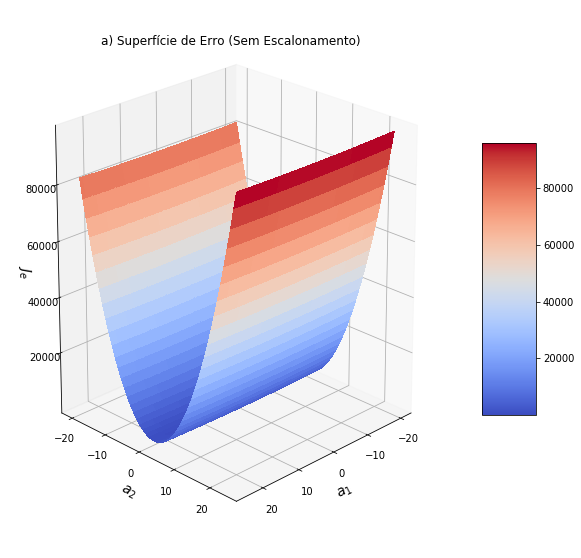

In [5]:
# Plot cost-function surface.
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('a) Superfície de Erro (Sem Escalonamento)')
ax.view_init(20, 45)
#Show the plot.
plt.show()

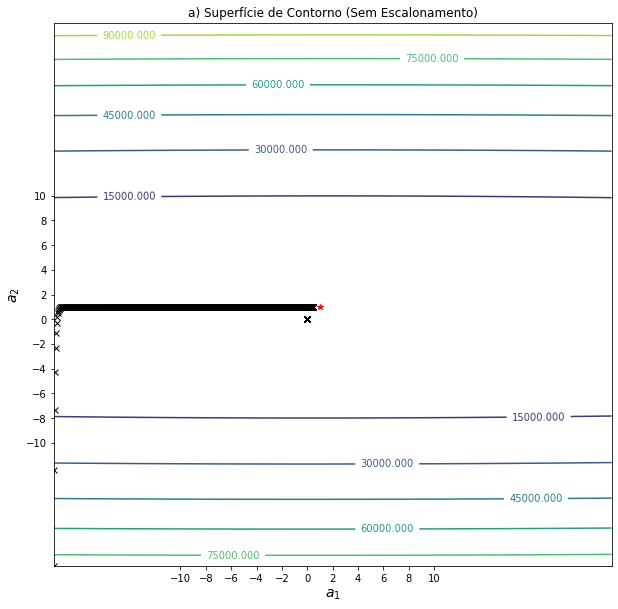

In [6]:
# Plot figure.        
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('a) Superfície de Contorno (Sem Escalonamento)')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

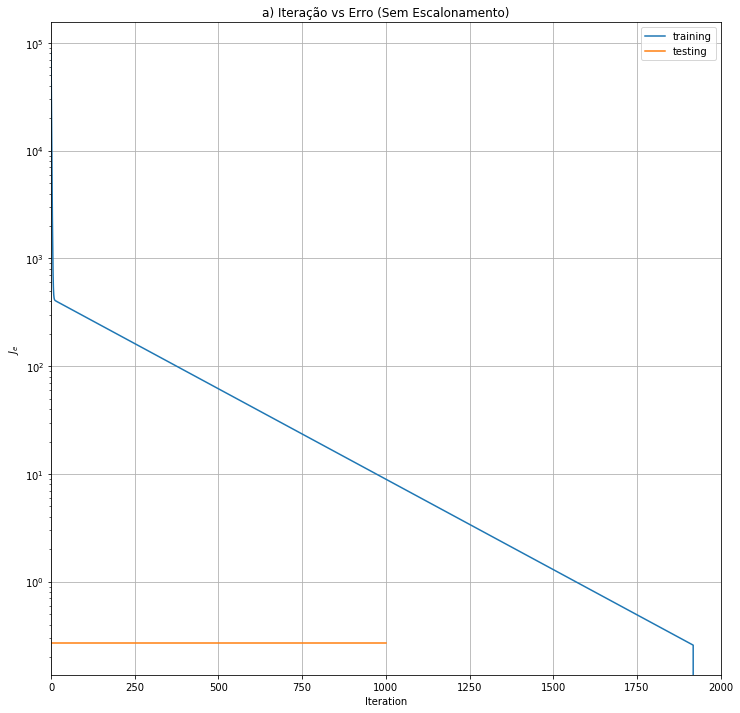

In [7]:
fig = plt.figure(figsize=(12,12))
plt.plot(np.arange(0, n_iterations), Jgd[0:n_iterations], label='training')
plt.plot(np.arange(0, 1000), Jgd_teste[0:1000], label='testing')
plt.xlim((0, n_iterations))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('a) Iteração vs Erro (Sem Escalonamento)')
plt.grid(b=True)
plt.legend()
plt.show()

In [8]:
minx1 = np.amin(x1)
maxx1 = np.amax(x1)

x1_Min_Max = np.array(np.ones((M, 1))) 

for i, item in enumerate(x1):
    x1_Min_Max[i,0] = (item - minx1) / (maxx1 - minx1)   
    
minx2 = np.amin(x2)
maxx2 = np.amax(x2)

x2_Min_Max = np.array(np.ones((M, 1)))

for i, item in enumerate(x2):
    x2_Min_Max[i,0] = (item - minx2) / (maxx2 - minx2)


x1_teste_Min_Max = np.array(np.ones((M, 1)))
    
for i, item in enumerate(x1_teste):
    x1_teste_Min_Max[i,0] = (item - minx1) / (maxx1 - minx1)

x2_teste_Min_Max = np.array(np.ones((M, 1)))
    
for i, item in enumerate(x2_teste):
    x2_teste_Min_Max[i,0] = (item - minx2) / (maxx2 - minx2)


XA_Min_Max = np.c_[x1_Min_Max, x2_Min_Max]
X_bA_Min_Max = XA_Min_Max

XA_Min_Max_Teste = np.c_[x1_teste_Min_Max, x2_teste_Min_Max]
X_bA_Min_Max_Teste = XA_Min_Max_Teste



alphaB = 1.3

In [9]:
# Calculate data point for plotting error surface.
J_Min_Max, A1_Min_Max, A2_Min_Max = calculateErrorSurface(y, x1_Min_Max, x2_Min_Max)

In [10]:
# Calculate closed-form solution.X, x1, x2, y
Joptimum_Min_Max, a_opt_Min_Max = calculateClosedFormSolutionA(X_bA_Min_Max, x1_Min_Max, x2_Min_Max, y)

In [11]:
# Run batch gradient-descent algorithm.
a_Min_Max, a_hist_Min_Max, Jgd_Min_Max, iteration_Min_Max = batchGradientDescentA(alphaB, n_iterations, X_bA_Min_Max, y)

Jgd_teste_Min_Max = batchGradientDescentTeste(a_Min_Max, 1000, X_bA_Min_Max_Teste, y_teste)

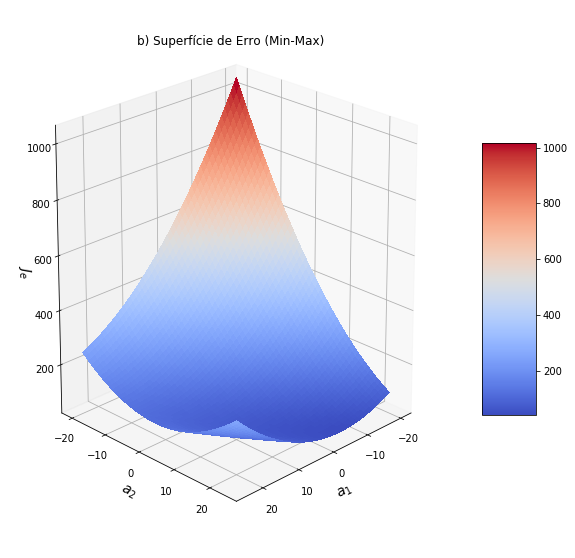

In [12]:
# Plot cost-function surface.
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1_Min_Max, A2_Min_Max, J_Min_Max, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('b) Superfície de Erro (Min-Max)')
ax.view_init(20, 45)
#Show the plot.
plt.show()

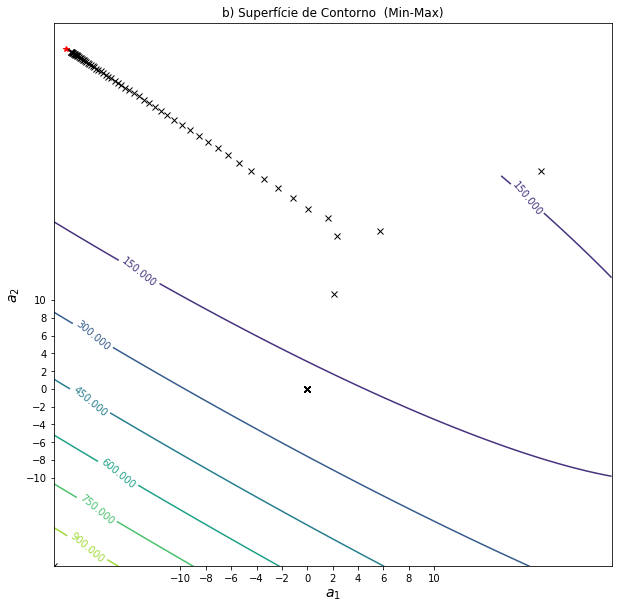

In [13]:
# Plot figure.        
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A1_Min_Max, A2_Min_Max, J_Min_Max)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('b) Superfície de Contorno  (Min-Max)')
plt.plot(a_opt_Min_Max[0], a_opt_Min_Max[1], c='r', marker='*')
plt.plot(a_hist_Min_Max[0, :], a_hist_Min_Max[1, :], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

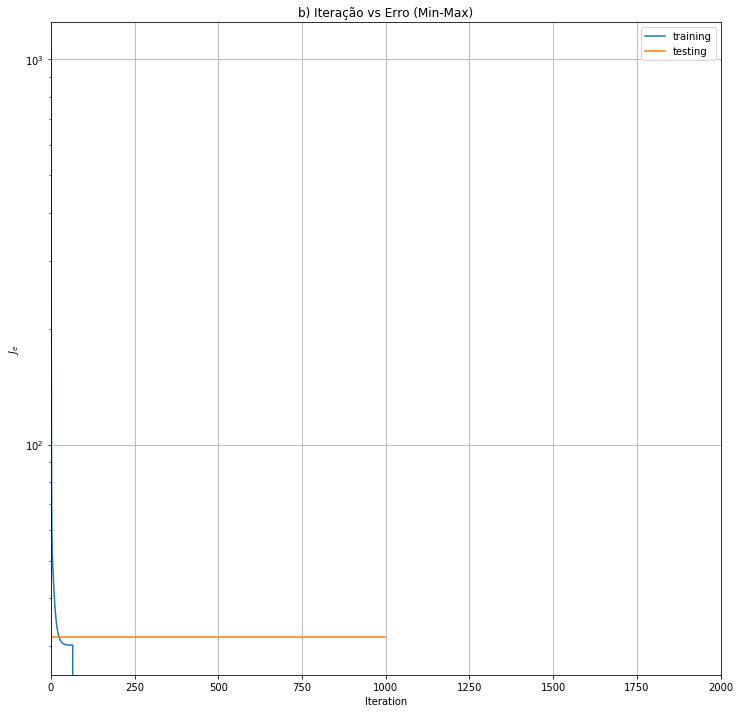

In [14]:
fig = plt.figure(figsize=(12,12))
plt.plot(np.arange(0, n_iterations), Jgd_Min_Max[0:n_iterations], label='training')
plt.plot(np.arange(0, 1000), Jgd_teste_Min_Max[0:1000], label='testing')
plt.xlim((0, n_iterations))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('b) Iteração vs Erro (Min-Max)')
plt.grid(b=True)
plt.legend()
plt.show()
#print(Jgd_Min_Max[0:30])

In [15]:
x1_Pad = np.array(np.ones((M, 1))) 

for i, item in enumerate(x1):
    x1_Pad[i,0] = (item - media_x1) / (desvioPadrao_x1)   

x2_Pad = np.array(np.ones((M, 1)))

for i, item in enumerate(x2):
    x2_Pad[i,0] = (item - media_x2) / (desvioPadrao_x2)

x1_teste_Pad = np.array(np.ones((M, 1)))
    
for i, item in enumerate(x1_teste):
    x1_teste_Pad[i,0] = (item - media_x1) / (desvioPadrao_x1)   

x2_teste_Pad = np.array(np.ones((M, 1)))
    
for i, item in enumerate(x2_teste):
    x2_teste_Pad[i,0] = (item - media_x2) / (desvioPadrao_x2)

XA_Pad = np.c_[x1_Pad, x2_Pad]
X_bA_Pad = XA_Pad

XA_Pad_Teste = np.c_[x1_teste_Pad, x2_teste_Pad]
X_bA_Pad_Teste = XA_Pad_Teste

alphaC = 0.5

In [16]:
# Calculate data point for plotting error surface.
J_Pad, A1_Pad, A2_Pad = calculateErrorSurface(y, x1_Pad, x2_Pad)

In [17]:
# Calculate closed-form solution.X, x1, x2, y
Joptimum_Pad, a_opt_Pad = calculateClosedFormSolutionA(X_bA_Pad, x1_Pad, x2_Pad, y)

In [18]:
# Run batch gradient-descent algorithm.
a_Pad, a_hist_Pad, Jgd_Pad, iteration_Pad = batchGradientDescentA(alphaC, n_iterations, X_bA_Pad, y)

Jgd_teste_Pad = batchGradientDescentTeste(a_Pad, 1000, X_bA_Pad_Teste, y_teste)

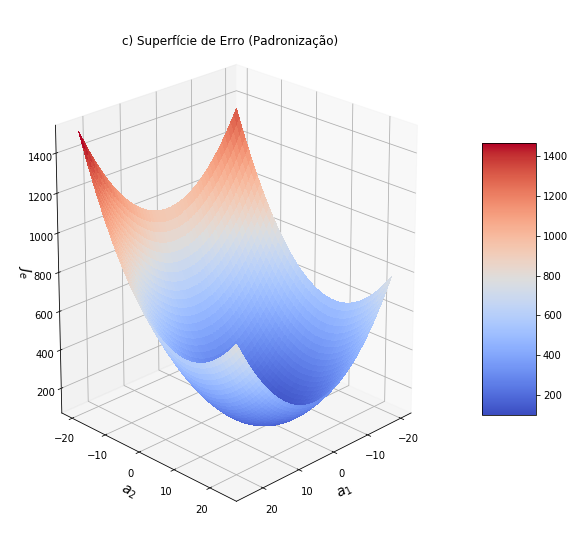

In [19]:
# Plot cost-function surface.
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1_Pad, A2_Pad, J_Pad, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('c) Superfície de Erro (Padronização)')
ax.view_init(20, 45)
#Show the plot.
plt.show()

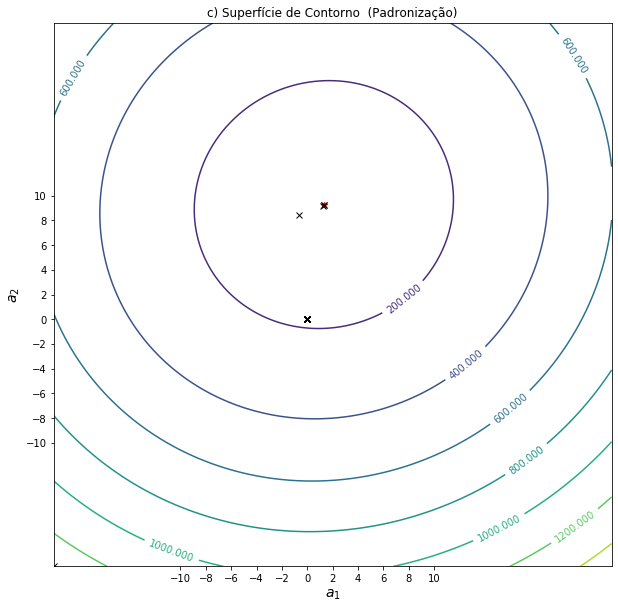

In [20]:
# Plot figure.        
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A1_Pad, A2_Pad, J_Pad)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('c) Superfície de Contorno  (Padronização)')
plt.plot(a_opt_Pad[0], a_opt_Pad[1], c='r', marker='*')
plt.plot(a_hist_Pad[0, :], a_hist_Pad[1, :], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

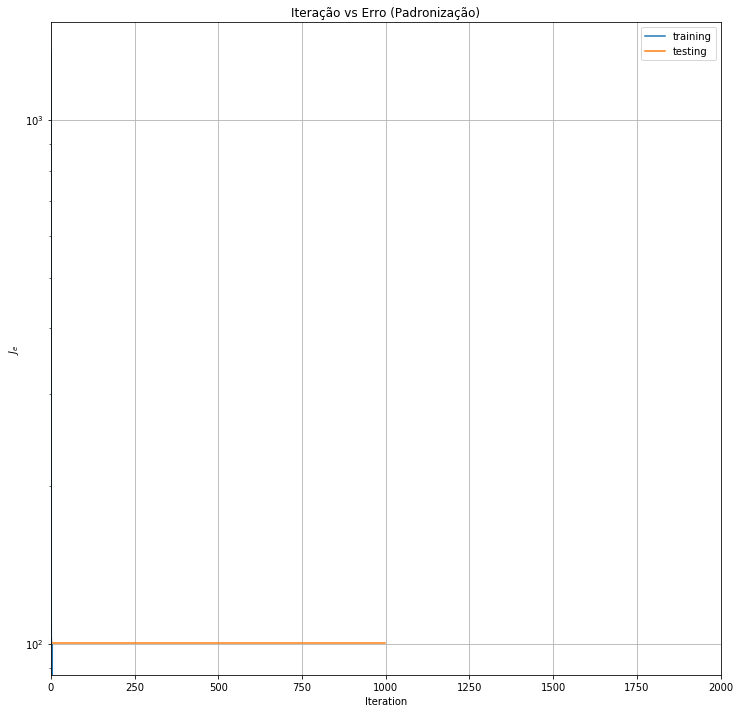

In [21]:
fig = plt.figure(figsize=(12,12))
plt.plot(np.arange(0, n_iterations), Jgd_Pad[0:n_iterations], label='training')
plt.plot(np.arange(0, 1000), Jgd_teste_Pad[0:1000], label='testing')
plt.xlim((0, n_iterations))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Iteração vs Erro (Padronização)')
plt.grid(b=True)
plt.legend()
plt.show()

In [22]:
# Generate target function.
y_Min_Max = x1_Min_Max + x2_Min_Max
y_teste_Min_Max = x1_teste_Min_Max + x2_teste_Min_Max


alphaD = 0.9

In [23]:
# Calculate data point for plotting error surface.
J_Min_Max_All, A1_Min_Max_All, A2_Min_Max_All = calculateErrorSurface(y_Min_Max, x1_Min_Max, x2_Min_Max)

In [24]:
# Calculate closed-form solution.X, x1, x2, y
Joptimum_Min_Max_All, a_opt_Min_Max_All = calculateClosedFormSolutionA(X_bA_Min_Max, x1_Min_Max, x2_Min_Max, y_Min_Max)

In [25]:
# Run batch gradient-descent algorithm.
a_Min_Max_All, a_hist_Min_Max_All, Jgd_Min_Max_All, iteration_Min_Max_All = batchGradientDescentA(alphaD, n_iterations, X_bA_Min_Max, y_Min_Max)

Jgd_teste_Min_Max_All = batchGradientDescentTeste(a_Min_Max_All, 1000, X_bA_Min_Max_Teste, y_teste_Min_Max)

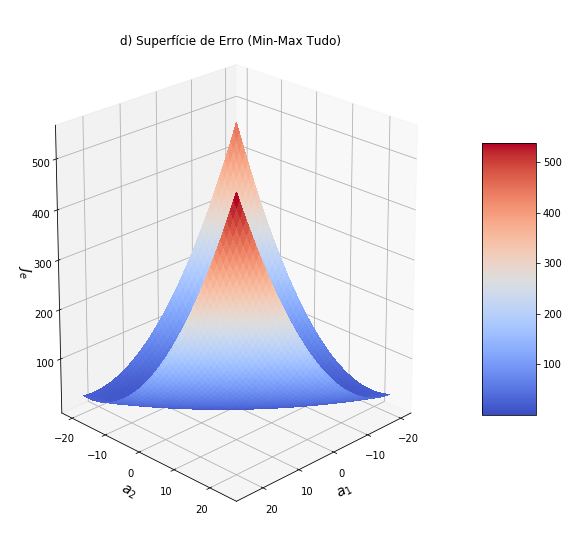

In [26]:
# Plot cost-function surface.
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1_Min_Max_All, A2_Min_Max_All, J_Min_Max_All, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('d) Superfície de Erro (Min-Max Tudo)')
ax.view_init(20, 45)
#Show the plot.
plt.show()

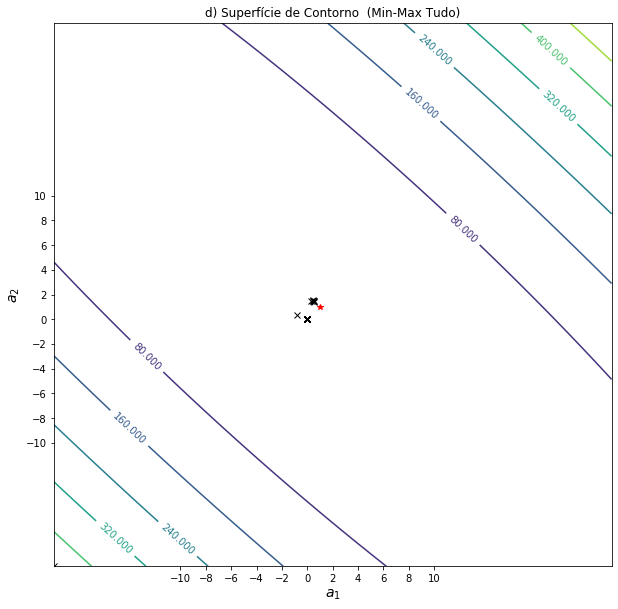

In [27]:
# Plot figure.        
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A1_Min_Max_All, A2_Min_Max_All, J_Min_Max_All)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('d) Superfície de Contorno  (Min-Max Tudo)')
plt.plot(a_opt_Min_Max_All[0], a_opt_Min_Max_All[1], c='r', marker='*')
plt.plot(a_hist_Min_Max_All[0, :], a_hist_Min_Max_All[1, :], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

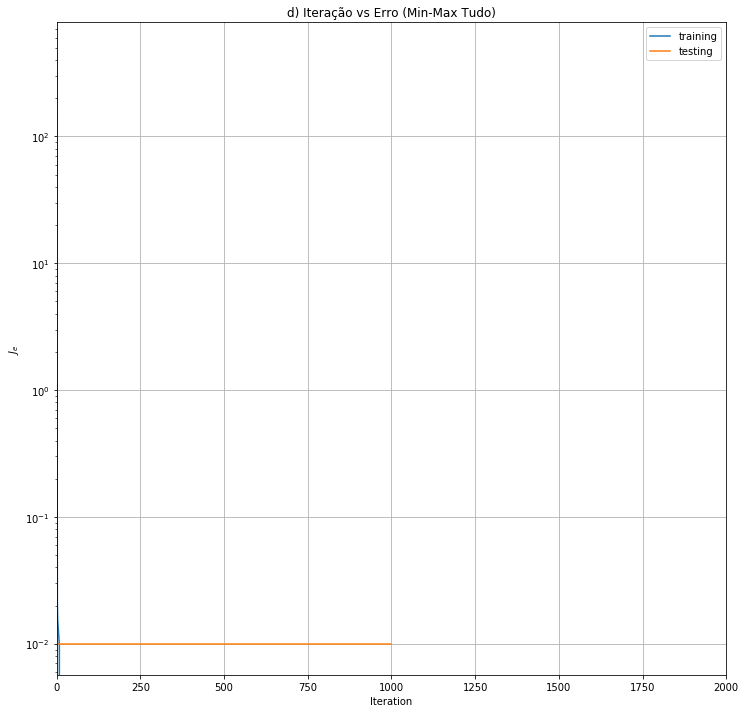

In [28]:
fig = plt.figure(figsize=(12,12))
plt.plot(np.arange(0, n_iterations), Jgd_Min_Max_All[0:n_iterations], label='training')
plt.plot(np.arange(0, 1000), Jgd_teste_Min_Max_All[0:1000], label='testing')
plt.xlim((0, n_iterations))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('d) Iteração vs Erro (Min-Max Tudo)')
plt.grid(b=True)
plt.legend()
plt.show()

In [29]:

    
# Generate target function.
y_Pad = x1_Pad + x2_Pad

y_teste_Pad = x1_teste_Pad + x2_teste_Pad


alphaE = 0.5

In [30]:
# Calculate data point for plotting error surface.
J_Pad_All, A1_Pad_All, A2_Pad_All = calculateErrorSurface(y_Pad, x1_Pad, x2_Pad)

In [31]:
# Calculate closed-form solution.X, x1, x2, y
Joptimum_Pad_All, a_opt_Pad_All = calculateClosedFormSolutionA(X_bA_Pad, x1_Pad, x2_Pad, y_Pad)

In [32]:
# Run batch gradient-descent algorithm.
a_Pad_All, a_hist_Pad_All, Jgd_Pad_All, n_iterations_Pad_All = batchGradientDescentA(alphaE, n_iterations, X_bA_Pad, y_Pad)

Jgd_teste_Pad_All = batchGradientDescentTeste(a_Pad_All, 1000, X_bA_Pad_Teste, y_teste_Pad)

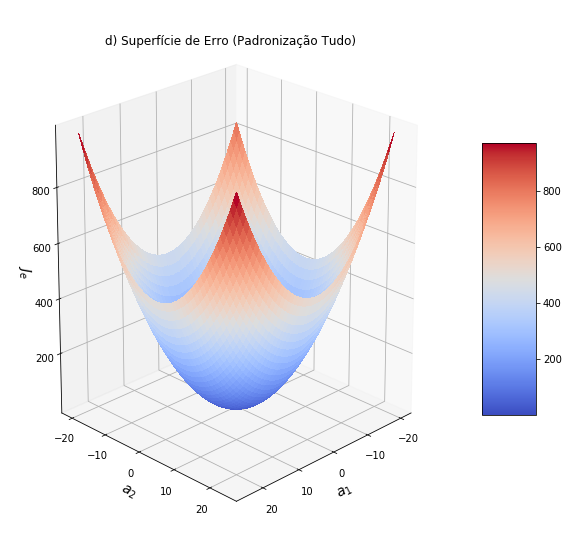

In [33]:
# Plot cost-function surface.
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1_Pad_All, A2_Pad_All, J_Pad_All, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('d) Superfície de Erro (Padronização Tudo)')
ax.view_init(20, 45)
#Show the plot.
plt.show()

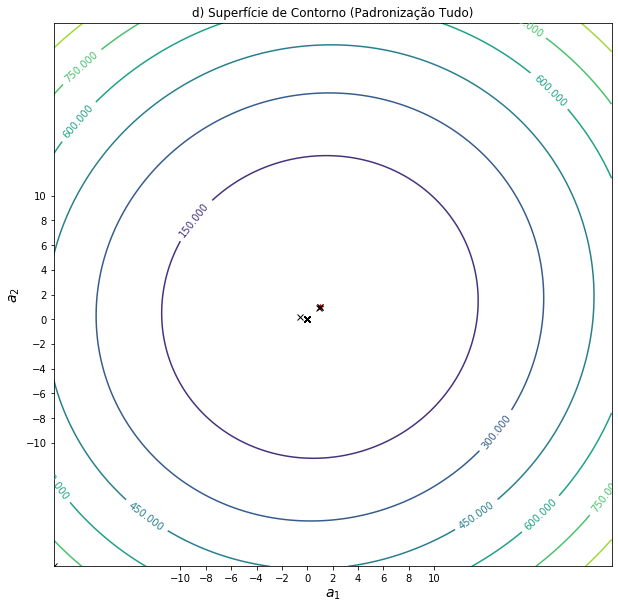

In [34]:
# Plot figure.        
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A1_Pad_All, A2_Pad_All, J_Pad_All)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('d) Superfície de Contorno (Padronização Tudo)')
plt.plot(a_opt_Pad_All[0], a_opt_Pad_All[1], c='r', marker='*')
plt.plot(a_hist_Pad_All[0, :], a_hist_Pad_All[1, :], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.show()

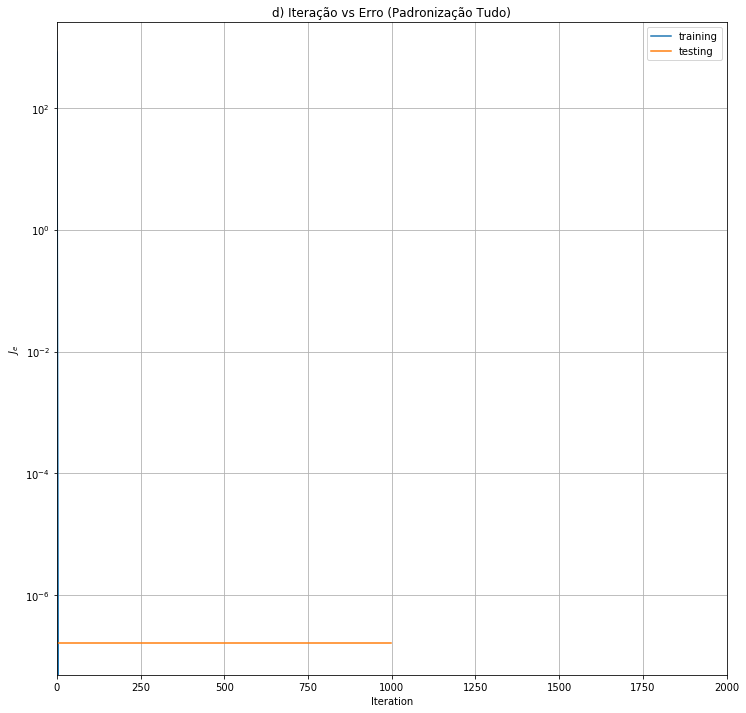

In [35]:
fig = plt.figure(figsize=(12,12))
plt.plot(np.arange(0, n_iterations), Jgd_Pad_All[0:n_iterations], label='training')
plt.plot(np.arange(0, 1000), Jgd_teste_Pad_All[0:1000], label='testing')
plt.xlim((0, n_iterations))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('d) Iteração vs Erro (Padronização Tudo)')
plt.grid(b=True)
plt.legend()
plt.show()

**e. Baseado nos resultados anteriores o que você pode concluir a respeito do escalonamento de features? (Dica: Comente a respeito das formas das superfícies de erro, dos números de iterações necessárias para se alcançar o ponto ótimo, isso se ele é alcançado, da diferença entre o erro quadrático médio obtido para o conjunto de treinamento e o obtido para o conjunto de testes (são similares ou diferentes), da diferença entre os valores do erro quadrático médio para os 3 casos acima, i.e., sem escalonamento e com os 2 tipos de escalonamento com e sem escalonamento dos labels (qual resulta no menor erro? Escalonar os labels traz algum benefício? Como ficam as superfícies de erro quando se escalona os labels?), e o que mais você achar interessante comentar. Quanto mais detalhada sua análise dos resultados, melhor será sua avaliação neste exercício.)**

R: 

Baseado nos resultados anteriores podemos concluir que o escalonamento de features é necessário sobretudo em casos onde existe uma grande diferença de magnitude entre os atributos e isso pode ser verificado logo na forma da superfície de erro, pois nesses casos a superfície de erro não se aproxima do formato de uma tigela. O formato em tigela é importante porque como usamos regressão linear a procura do ponto óptimo torna-se mais difícil pois o fundo da tigela não existe. Mesmo assim é possível encontrar o ponto óptimo, apesar dessa tarefa tornar-se mais difícil. No nosso exemplo, na superfície de contorno verificamos que o algoritmo não chega ao ponto óptimo. Além disso, o batch que geralmente caminha em linha recta em direcção ao centro não é capaz de fazer isso nesse caso específico e a superfície de contorno nem sequer é circular. O gráfico de iteração vs erro mostra que o algoritmo apresenta um desempenho bom no conjunto de testes, e pode melhorar ligeiramente caso não existisse a condição de paragem quando o erro entre duas iterações fosse menor que 0.001. No entanto, vale a pena ressaltar que ele leva mais de 1900 iterações para convergir. Além disso, quando usamos o conjunto de testes o desempenho é excelente, ficando muito perto do desempenho no final do treinamento.


Após fazer o escalonamento de features usando a técnica de min-max às features de treinamento e teste observamos que a superfície de erro aproxima-se um pouco ao formato de tigela, facilitando encontrar o ponto óptimo (se tivermos como critério de comparação a superfície sem o escalonamento). Verificamos que a superfície de contorno continua não sendo circular, que mais uma vez apesar de ser batch ele volta a fazer uma curva, que dura muito menos iterações e após essa curva terminar mesmo assim o algoritmo não consegue alcançar o ponto óptimo. O gráfico de iterações vs erro mostra que o algoritmo converge com muito menos iterações (menos de 100). No conjunto de testes o desempenho é excelente, pouco acima do desempenho no final do treinamento.


No escalonamento às features de treinamento e teste usando a técnica de padronização observamos que a superfície de erro apresenta um formato de tigela, o que facilita encontrar o ponto óptimo. Sobre a superfície de contorno podemos observar que que já é circular e que o caminho até ao ponto óptimo é alcançado com poucas iterações. No gráfico de iterações vs erro podemos observar que o algoritmo converge em pouquíssimas iterações, no entanto o erro quadrático é de 30, e o erro só não diminuiu ainda mais devido à condição de paragem quando o erro entre duas épocas consecutivas for menor do que 0.001. Em contrapartida, ele converge em menos de 10 iterações. No que toca o conjunto de testes, o desempenho é excelente.


No escalonamento de features e rótulos usando a técnica de min-max dá a sensação de que a superfície de erro estar no formato de U. No que toca a superfície de contorno, apesar dela não apresentar diferenças em relação ao formato (em relação a padronização das features usando min-max), as tentantivas estão bem mais próximas do ponto óptimo sem muitas iterações, e chega muito próximo do ponto óptimo. Em relação ao gráfico de iterações vs erro observamos que ele converge em poucas iterações, que no conjunto de treinamento a taxa de erro é muito boa (abaixo dos 10^-2), convergindo em menos de 10 iterações e no conjunto de testes, o desempenho é excelente.


No escalonamento de features e rótulos usando a técnica de padronização podemos observar que a superfície de erro agora possui o formato de uma tigela. No que toca a superfície de contorno, as tentativas estão bem mais próximas do ponto óptimo com poucas iterações, chegando mesmo a alcança-lo. Em relação ao gráfico de iterações vs erro observamos que ele converge em poucas iterações, apresentando erros abaixo de 10^0 no conjunto de treinammento, convergindo em 5 iterações. No conjunto de testes a taxa de erro também é excelente.


Apesar de escalonar as features e labels aparentar produzir resultados melhores, sobretudo no conjunto de testes, a verdade é que reduz o nível de detalhe e pode levar à falsa sensação de que o modelo de predição é bem melhor do que realmente é


Podemos ainda concluir que em alguns em alguns casos a condição de paragem pode fazer com que o o treinamento termine quando o algoritmo está bem próximo do ponto óptimo, podendo ser ligeiramente melhorado. Nós podemos observar isso na padronização das features, onde o algoritmo converge em poucas iterações mas sem atingir o ponto óptimo.